<h2>Import bibliotek</h2>

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

<h2>Zadanie 6.</h2>

<h3>$y' = \alpha t^{\alpha-1}, \alpha > 0$</h3>

<h3>$y(0) = 0$</h3>

<h3>Solution: $y(t) = t^\alpha$</h3>

In [2]:
# define derivative
def dy_dt(alpha, t):
    return alpha * t**(alpha-1)

# define t0, t_end and y0
t0 = 0
t_end = 10
y0 = 0

# define solution
def y(alpha, t):
    return t**alpha

Definicja alf i h

In [3]:
# define alphas
alphas = np.array([2.5, 1.5, 1.1], dtype=np.float64)
# define hs
hs = np.array([0.2, 0.1, 0.05], dtype=np.float64)

Metoda Eulera

In [4]:
# Euler method function
def euler(t0, t_end, y0, h, alpha):
    ts = [t0]
    ys = [y0]
    while ts[-1] < t_end - h:
        ys.append(ys[-1] + h*dy_dt(alpha, ts[-1]))
        ts.append(ts[-1] + h)
    ts = np.array(ts)
    ys = np.array(ys)
    return ts, ys, np.abs(ys - y(alpha, ts))

<h4>Obliczenie wyników</h4>

In [5]:
# get results for alpha1 and all hs
results1 = [euler(t0, t_end, y0, h, alphas[0]) for h in hs]
# get results for alpha2 and all hs
results2 = [euler(t0, t_end, y0, h, alphas[1]) for h in hs]
# get results for alpha3 and all hs
results3 = [euler(t0, t_end, y0, h, alphas[2]) for h in hs]

<h4>Wykresy błędów</h4>

Funkcja rysująca wykres błędów

In [6]:
def plot_errors(alpha, x_start, x_end, hs, results):
    # set figsize
    plt.figure(figsize=(12,8))
    # add title and labels
    plt.title(rf"Euler method errors for $y' = {alpha}t^{{{round(alpha-1.0, 10)}}}$ and $y(0) = 0$")
    plt.xlabel("t")
    plt.ylabel("abs(err)")
    # plot errors
    for i in range(len(hs)):
        plt.plot(results[i][0], results[i][2], label=f"h={hs[i]}")
    # show with legend
    plt.legend()
    plt.grid()
    plt.show()

$\alpha_1 = 2.5$

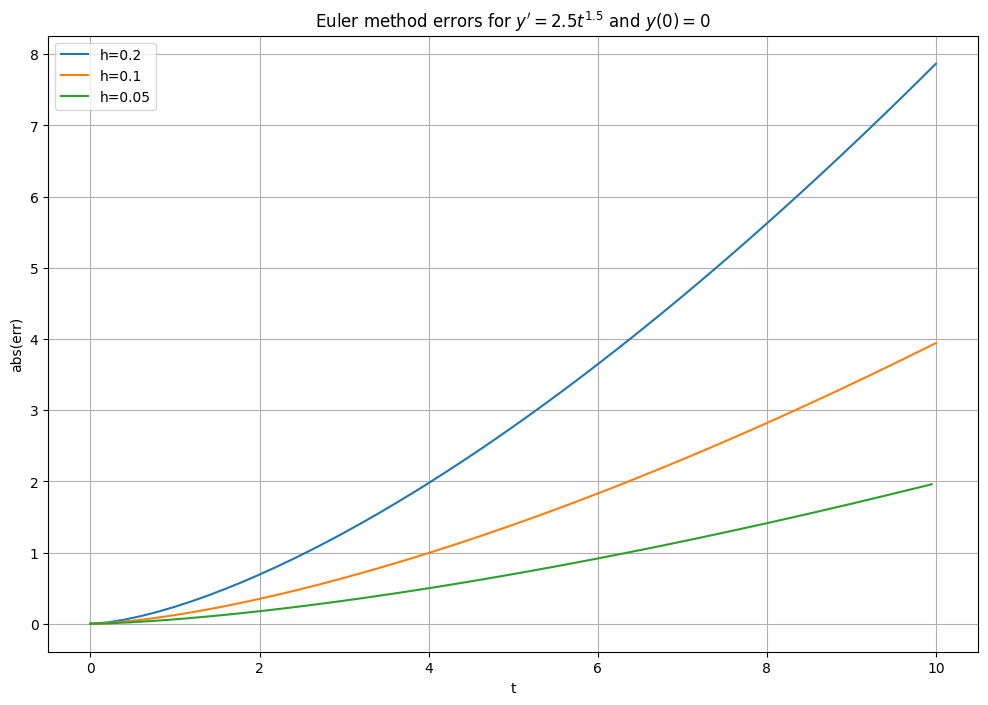

In [7]:
# plot errors
plot_errors(alphas[0], t0, t_end, hs, results1)

$\alpha_2 = 1.5$

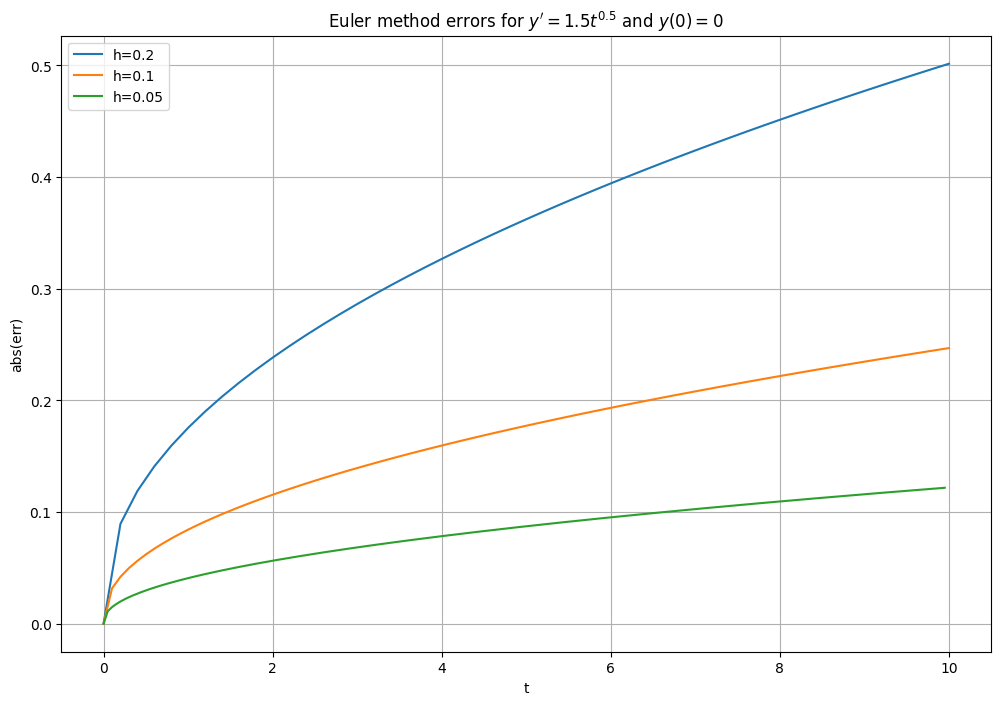

In [8]:
# plot errors
plot_errors(alphas[1], t0, t_end, hs, results2)

$\alpha_3 = 1.1$

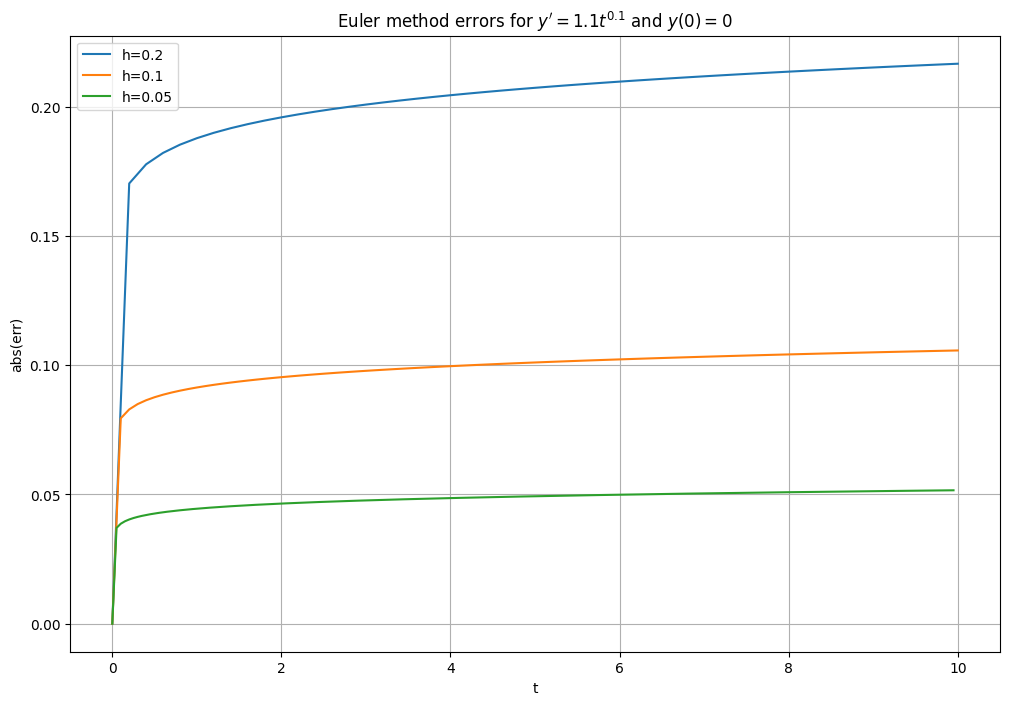

In [9]:
# plot errors
plot_errors(alphas[2], t0, t_end, hs, results3)

<h4>Empiryczne rzędy zbieżności</h4>

Funkcja rysująca empiryczne rzędy zbieżności

In [10]:
def plot_orders(alpha, x_start, x_end, hs, results):
    # set figsize
    plt.figure(figsize=(12,8))
    # add title and labels
    plt.title(rf"Empiric Euler method orders of convergence for $y' = {alpha}t^{{{round(alpha-1.0, 10)}}}$ and $y(0) = 0$")
    plt.xlabel("t")
    plt.ylabel("r(t)")
    # plot errors
    h_comparisons = [[0, 1], [1, 2], [0, 2]]
    for h1, h2 in h_comparisons:
        errs1 = results[h1][2]
        errs2 = results[h2][2]
        h_div = hs[h1] / hs[h2]
        errs1 = errs1[1:]
        errs2 = errs2[int(h_div)-1::int(h_div)]
        plt.plot(results[h1][0][1:], np.log(errs1/errs2) / np.log(h_div), label=rf"$h_1={hs[h1]}$, $h_2={hs[h2]}$")
    # show with legend
    plt.legend()
    plt.grid()
    plt.show()

$\alpha_1 = 2.5$

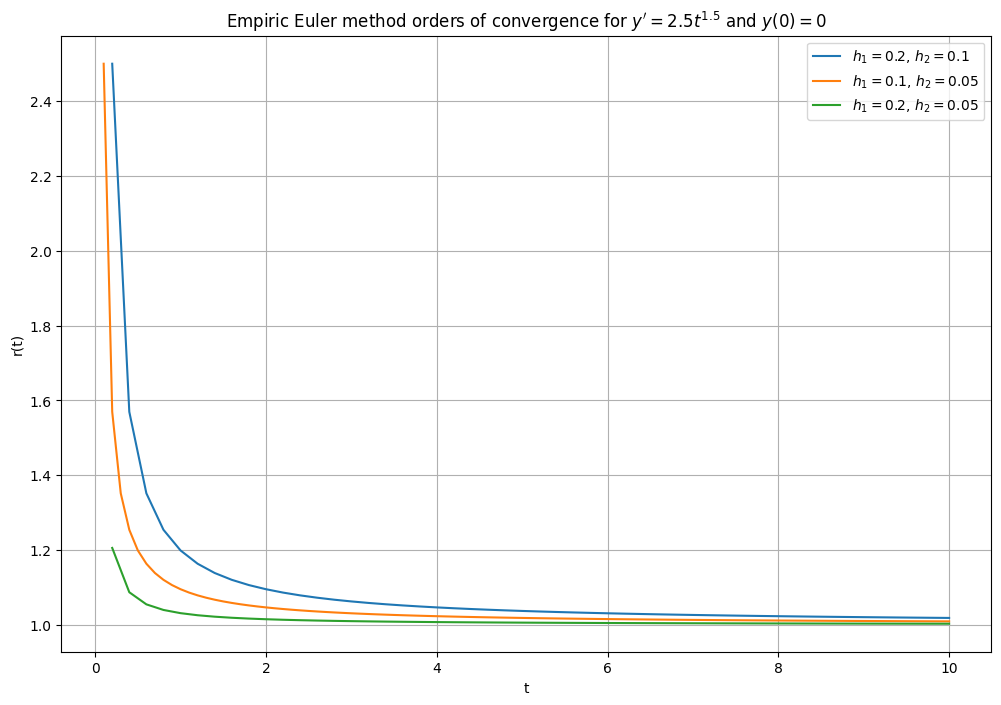

In [11]:
# plot orders
plot_orders(alphas[0], t0, t_end, hs, results1)

$\alpha_2 = 1.5$

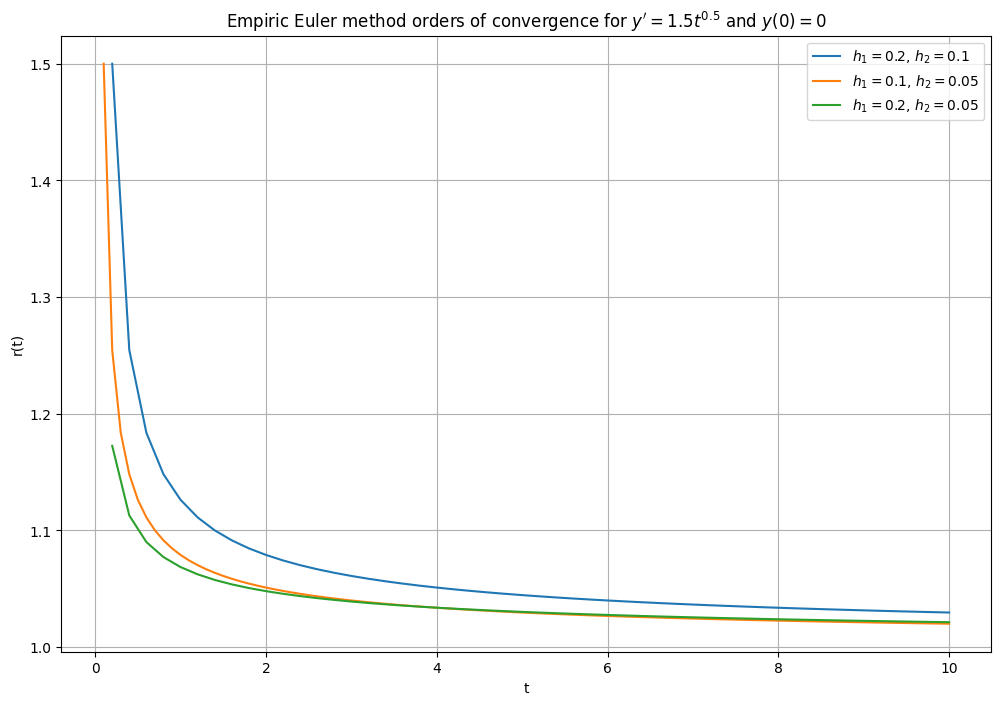

In [12]:
# plot orders
plot_orders(alphas[1], t0, t_end, hs, results2)

$\alpha_3 = 1.1$

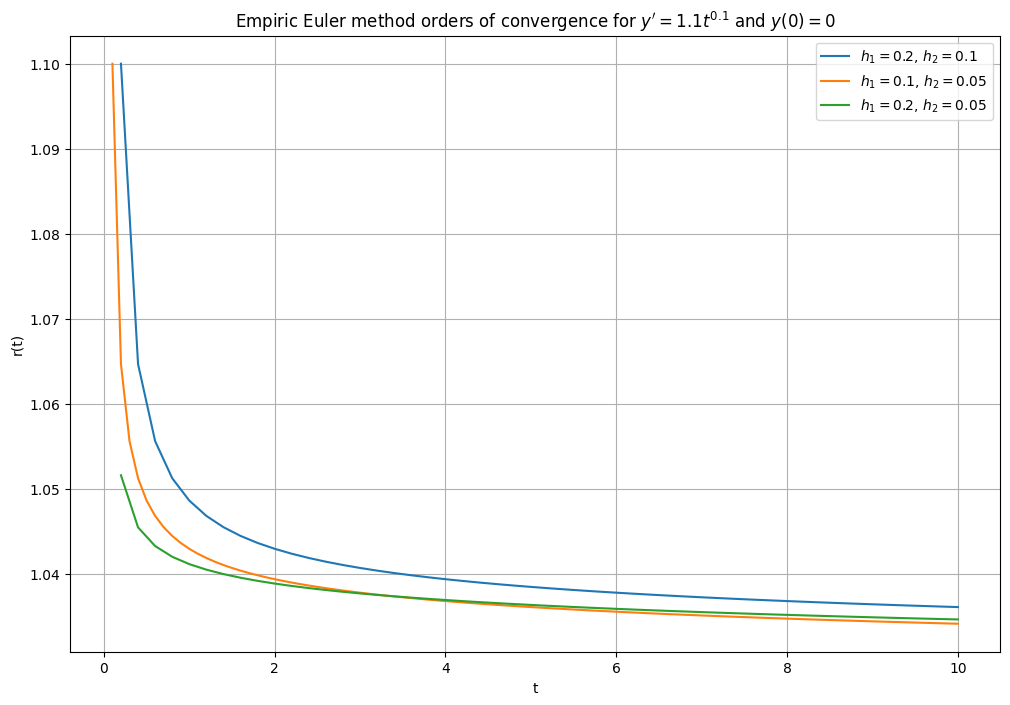

In [13]:
# plot orders
plot_orders(alphas[2], t0, t_end, hs, results3)